In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reading Dataset
data = pd.read_csv('Project_Data.csv', index_col = 0)
data.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
Sales of Wheat in tons,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19


In [3]:
# check for any missing values
print((data == 0).sum())

1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    2
1997    1
1998    2
1999    1
2000    2
2001    2
2002    0
2003    3
2004    0
2005    0
2006    0
2007    0
dtype: int64


In [4]:
#Remove zero 
data = data.replace(0, np.NaN)
data.dropna(inplace=True)

In [5]:
#Rename Column
data.index.names = ['country']
data.columns.names = ['year']

In [6]:
data.head()

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
country,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397.0,387.0,374.0,373.0,346.0,326.0,304,308.0,283,267,251,238
Albania,42,40,41,42,42,43,42.0,44.0,43.0,42.0,40.0,34.0,32,32.0,29,29,26,22
Algeria,45,44,44,43,43,42,43.0,44.0,45.0,46.0,48.0,49.0,50,51.0,52,53,55,56
Andorra,39,37,35,33,32,30,28.0,23.0,24.0,22.0,20.0,20.0,21,18.0,19,18,17,19
Angola,514,514,513,512,510,508,512.0,363.0,414.0,384.0,530.0,335.0,307,281.0,318,331,302,294


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, Afghanistan to Zimbabwe
Data columns (total 18 columns):
1990    203 non-null object
1991    203 non-null object
1992    203 non-null object
1993    203 non-null object
1994    203 non-null object
1995    203 non-null object
1996    203 non-null float64
1997    203 non-null float64
1998    203 non-null float64
1999    203 non-null float64
2000    203 non-null float64
2001    203 non-null float64
2002    203 non-null int64
2003    203 non-null float64
2004    203 non-null object
2005    203 non-null object
2006    203 non-null object
2007    203 non-null object
dtypes: float64(7), int64(1), object(10)
memory usage: 30.1+ KB


In [8]:
data['1990'] = data['1990'].str.replace(",","").astype(float)
data['1991'] = data['1991'].str.replace(",","").astype(float)
data['1992'] = data['1992'].str.replace(",","").astype(float)
data['1993'] = data['1993'].str.replace(",","").astype(float)
data['1994'] = data['1994'].str.replace(",","").astype(float)
data['1995'] = data['1995'].str.replace(",","").astype(float)
data['2004'] = data['2004'].str.replace(",","").astype(float)
data['2005'] = data['2005'].str.replace(",","").astype(float)
data['2006'] = data['2006'].str.replace(",","").astype(float)
data['2007'] = data['2007'].str.replace(",","").astype(float)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, Afghanistan to Zimbabwe
Data columns (total 18 columns):
1990    203 non-null float64
1991    203 non-null float64
1992    203 non-null float64
1993    203 non-null float64
1994    203 non-null float64
1995    203 non-null float64
1996    203 non-null float64
1997    203 non-null float64
1998    203 non-null float64
1999    203 non-null float64
2000    203 non-null float64
2001    203 non-null float64
2002    203 non-null int64
2003    203 non-null float64
2004    203 non-null float64
2005    203 non-null float64
2006    203 non-null float64
2007    203 non-null float64
dtypes: float64(17), int64(1)
memory usage: 30.1+ KB


__Dimensionality Reduction using PCA__

__Scree Plot__

In [10]:
from sklearn.decomposition import PCA

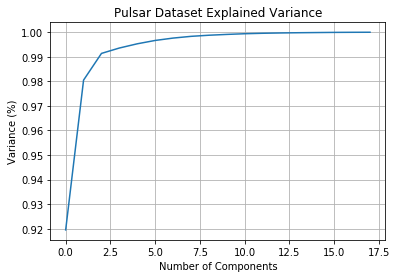

In [11]:
pca = PCA().fit(data)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.grid(True)
plt.show()

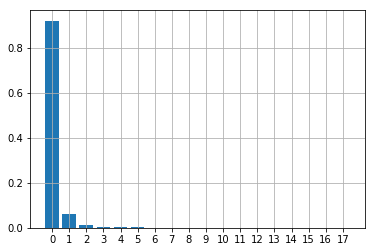

In [12]:
#Scree plot 
plt.bar(range(pca.n_components_),pca.explained_variance_ratio_)
plt.xticks(range(pca.n_components_))
plt.grid(True)

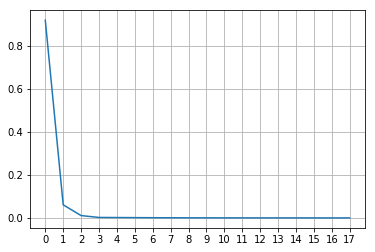

In [13]:
plt.plot(range(pca.n_components_),pca.explained_variance_ratio_)
plt.xticks(range(pca.n_components_))
plt.grid(True)

__Confirm the value of n_components as 3__

In [14]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1','PC2','PC'])
principalDf.index = data.index
principalDf.head()

,PC1,PC2,PC
country,,,
Afghanistan,721.112241,204.203491,-90.675582
Albania,-624.518353,6.551066,4.873375
Algeria,-580.553947,-35.056048,24.074278
Andorra,-673.004682,12.876423,28.048594
Angola,979.462066,295.086986,-67.018507


### Using KMeans

In [15]:
from sklearn.cluster import KMeans

In [16]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit(data)

In [17]:
principalDf['cluster'] = pd.Series(clusters.labels_, index=principalDf.index)

In [18]:
centroids = clusters.cluster_centers_

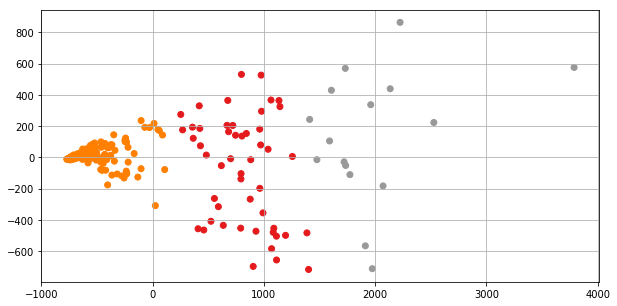

In [19]:
plt.figure(figsize=(10,5))
plt.scatter(principalDf.iloc[:, 0], principalDf.iloc[:, 1], c=principalDf.cluster, cmap = 'Set1')
plt.grid(True)
plt.show()

In [20]:
from sklearn.preprocessing import normalize

principalDf['country_mean'] = pd.Series(principalDf.mean(axis=1), index=principalDf.index)
country_mean_max = principalDf['country_mean'].max()
country_mean_min = principalDf['country_mean'].min()
country_mean_scaled = (principalDf.country_mean-country_mean_min) / country_mean_max
principalDf['country_mean_scaled'] = pd.Series(
    country_mean_scaled, 
    index=principalDf.index)
principalDf.head()

,PC1,PC2,PC,cluster,country_mean,country_mean_scaled
country,,,,,,
Afghanistan,721.112241,204.203491,-90.675582,0,208.660037,0.302628
Albania,-624.518353,6.551066,4.873375,1,-153.023478,0.027379
Algeria,-580.553947,-35.056048,24.074278,1,-147.633929,0.031481
Andorra,-673.004682,12.876423,28.048594,1,-157.769916,0.023767
Angola,979.462066,295.086986,-67.018507,0,301.882636,0.373573


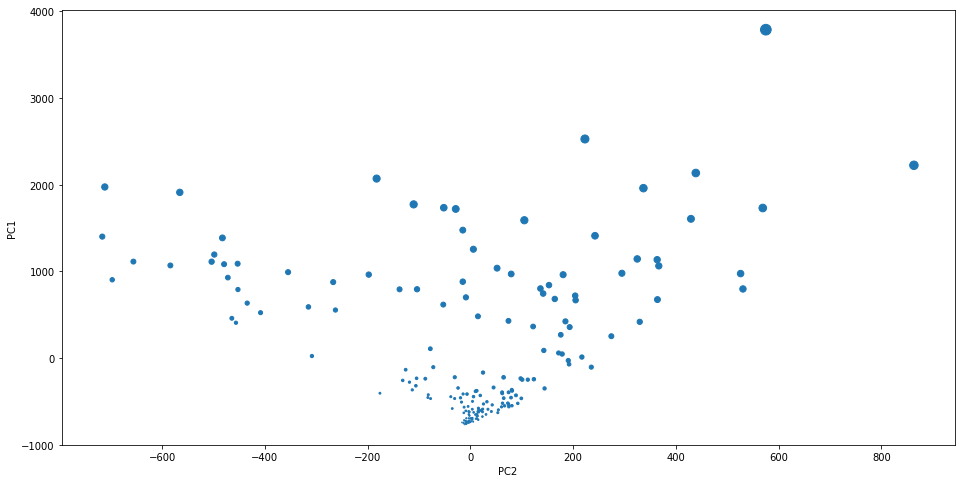

In [21]:
principalDf.plot(kind='scatter', x='PC2', y='PC1', s=principalDf['country_mean_scaled']*100, figsize=(16,8))

In [22]:
principalDf['country_sum'] = pd.Series(data.sum(axis=1), index=principalDf.index)
country_sum_max = principalDf['country_sum'].max()
country_sum_min = principalDf['country_sum'].min()
country_sum_scaled = (principalDf.country_sum-country_sum_min) / country_sum_max
principalDf['country_sum_scaled'] = pd.Series(
    country_sum_scaled, 
    index=principalDf.index)


In [23]:
principalDf['country_change'] = pd.Series(data['2007']-data['1990'], index=principalDf.index)
country_change_max = principalDf['country_change'].max()
country_change_min = principalDf['country_change'].min()
country_change_scaled = (principalDf.country_change - country_change_min) / country_change_max
principalDf['country_change_scaled'] = pd.Series(
    country_change_scaled, 
    index=principalDf.index)
principalDf.head()

,PC1,PC2,PC,cluster,country_mean,country_mean_scaled,country_sum,country_sum_scaled,country_change,country_change_scaled
country,,,,,,,,,,
Afghanistan,721.112241,204.203491,-90.675582,0,208.660037,0.302628,6360.0,0.329731,-198.0,0.850840
Albania,-624.518353,6.551066,4.873375,1,-153.023478,0.027379,665.0,0.032420,-20.0,1.224790
Algeria,-580.553947,-35.056048,24.074278,1,-147.633929,0.031481,853.0,0.042234,11.0,1.289916
Andorra,-673.004682,12.876423,28.048594,1,-157.769916,0.023767,455.0,0.021457,-20.0,1.224790
Angola,979.462066,295.086986,-67.018507,0,301.882636,0.373573,7442.0,0.386218,-220.0,0.804622


In [24]:
principalDf.describe()

,PC1,PC2,PC,cluster,country_mean,country_mean_scaled,country_sum,country_sum_scaled,country_change,country_change_scaled
count,2.030000e+02,2.030000e+02,2.030000e+02,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,-1.120067e-15,1.232074e-14,5.600337e-16,0.832512,0.208128,0.143992,3312.990148,0.170660,-29.000000,1.205882
std,8.574619e+02,2.208472e+02,9.324216e+01,0.546390,222.583890,0.169391,3633.446306,0.189687,148.452513,0.311875
min,-7.707521e+02,-7.162842e+02,-4.010183e+02,0.000000,-189.000194,0.000000,44.000000,0.000000,-603.000000,0.000000
25%,-6.480101e+02,-1.538587e+01,-2.327534e+01,1.000000,-154.486493,0.026266,563.500000,0.027121,-71.000000,1.117647
50%,-4.127199e+02,2.446209e+00,1.492385e+01,1.000000,-103.752758,0.064875,1579.000000,0.080136,-19.000000,1.226891
75%,6.521427e+02,7.481872e+01,2.483260e+01,1.000000,133.180560,0.245187,6093.000000,0.315792,-2.000000,1.262605
max,3.788273e+03,8.634827e+02,8.905356e+02,2.000000,1314.021183,1.143833,19155.000000,0.997703,476.000000,2.266807


### Using Hierarchial Clustering

In [25]:
principalDf_hc= principalDf.iloc[:,0:3]

In [26]:
principalDf_hc.head()

,PC1,PC2,PC
country,,,
Afghanistan,721.112241,204.203491,-90.675582
Albania,-624.518353,6.551066,4.873375
Algeria,-580.553947,-35.056048,24.074278
Andorra,-673.004682,12.876423,28.048594
Angola,979.462066,295.086986,-67.018507


In [27]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

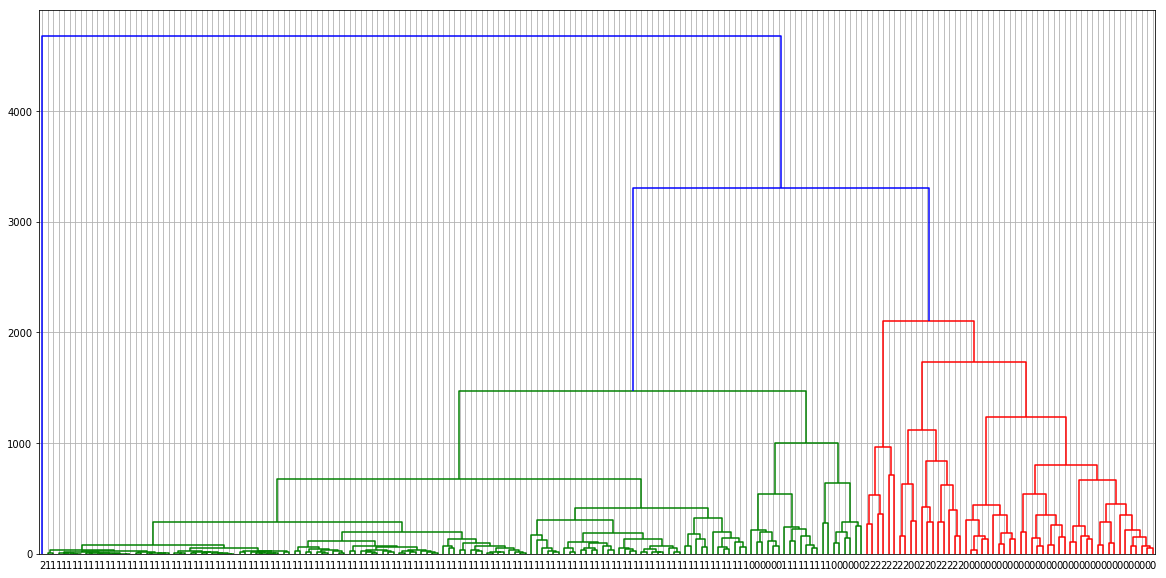

In [28]:
'Linkage does the hierarching'
plt.figure(figsize=(20,10))
mergings=linkage(principalDf_hc, method='complete')

'Dendogram does the plotting'
dendrogram(mergings, labels=principalDf.cluster,leaf_font_size=10, leaf_rotation=0)
plt.grid(True)
plt.show()

In [29]:
dt = data
data['consistentImpoter']=data.mean(axis=1)
data['MaxImpoter'] =data.sum(axis=1)

In [45]:
#Maximum Importer
dt.sort_values('MaxImpoter',ascending=0).iloc[:,-1].head(n=10)

country
Djibouti            20219.166667
Cambodia            14793.611111
Kiribati            13354.888889
Korea, Dem. Rep.    13045.611111
Togo                12783.833333
Sierra Leone        12409.111111
Philippines         12248.666667
Swaziland           12096.666667
South Africa        11387.333333
Mauritania          11292.333333
Name: MaxImpoter, dtype: float64

In [46]:
#Consistent Importer
dt.sort_values('consistentImpoter',ascending=0).iloc[:,-2].head(n=10)

country
Djibouti            1064.166667
Cambodia             778.611111
Kiribati             702.888889
Korea, Dem. Rep.     686.611111
Togo                 672.833333
Sierra Leone         653.111111
Philippines          644.666667
Swaziland            636.666667
South Africa         599.333333
Mauritania           594.333333
Name: consistentImpoter, dtype: float64